In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
batch_size = 32
epochs = 30
height = 32
width = 32
Channels = 1

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\New Folder (2)\Mini Project",
    shuffle=True,
    image_size=(height, width),
    batch_size=batch_size,
    color_mode='grayscale'
)

Found 166605 files belonging to 314 classes.


In [4]:
class_names = dataset.class_names
class_names

['#',
 '$',
 '%',
 '&',
 '+',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'Downarrow',
 'E',
 'F',
 'G',
 'H',
 'I',
 'Im',
 'J',
 'K',
 'L',
 'Leftrightarrow',
 'Longleftrightarrow',
 'Longrightarrow',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'Re',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 ']',
 'aa',
 'ae',
 'aleph',
 'alpha',
 'amalg',
 'angle',
 'approx',
 'ast',
 'astrosun',
 'asymp',
 'backsim',
 'backslash',
 'barwedge',
 'because',
 'beta',
 'between',
 'blacksquare',
 'blacktriangleright',
 'bot',
 'bowtie',
 'boxdot',
 'boxplus',
 'boxtimes',
 'bullet',
 'cap',
 'cdot',
 'celsius',
 'checked',
 'checkmark',
 'chi',
 'circ',
 'circlearrowleft',
 'circlearrowright',
 'circledR',
 'circledast',
 'circledcirc',
 'clubsuit',
 'cong',
 'coprod',
 'copyright',
 'cup',
 'curvearrowright',
 'dag',
 'dashv',
 'ddots',
 'degree',
 'delta',
 'diameter',
 'diamond',
 'diamondsuit',
 'div',
 'doteq',
 'dots',
 'dotsc',
 'ell',
 'empty

In [5]:
len(dataset)

5207

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 32, 32, 1)
[212  48 131   0 229  33 272 126 256  78 289 243 303 268 310  80 281  53
  42  58 124 239 105 143 214 108 257  87 231 114  68 107]


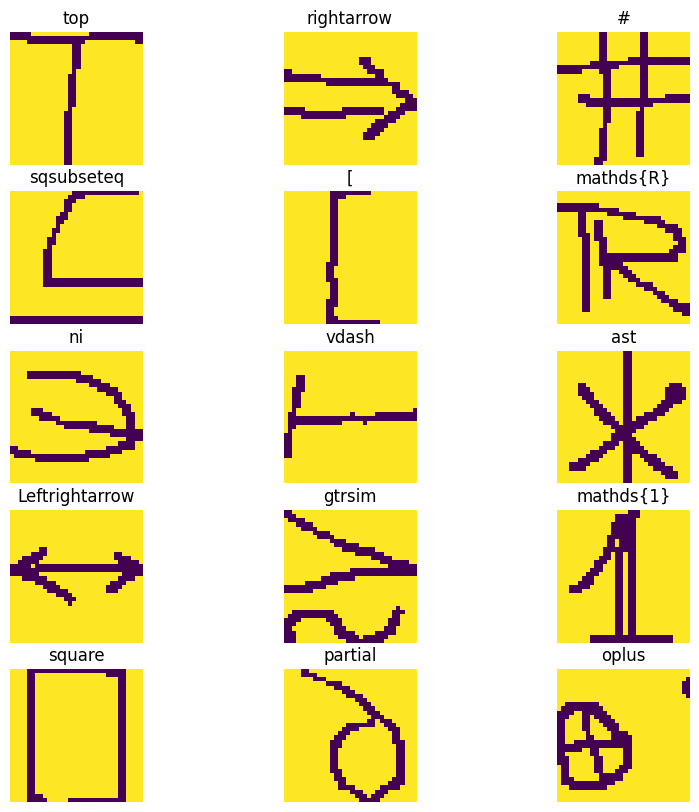

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(15):
        ax = plt.subplot(5,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

In [8]:
def get_dataset_partitions_tf(dataset, train_split = 0.8, val_split=0.1,test_split = 0.1 ,shuffle = True, shuffle_size = 10000):
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed = 12)
    ds_size = len(dataset)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [9]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [10]:
len(train_ds)

4165

In [11]:
len(val_ds)

520

In [12]:
len(test_ds)

522

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1080).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
image_size = (height,width)
resize_and_rescale = tf.keras.Sequential([

    layers.experimental.preprocessing.Resizing(height,width),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [16]:
height = 32
width = 32
Channels = 1  
n_classes = 314

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Input(shape=(height, width, Channels)), 
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=(None, height, width, Channels))  


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 1)         0         
                                                                 
 sequential_1 (Sequential)   (None, 32, 32, 1)         0         
                                                                 
 input_1 (InputLayer)        multiple                  0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                      

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
4165/4165 [==============================] - 256s 49ms/step - loss: 3.4687 - accuracy: 0.2458 - val_loss: 2.6620 - val_accuracy: 0.3728
Epoch 2/30
4165/4165 [==============================] - 183s 44ms/step - loss: 2.3376 - accuracy: 0.4273 - val_loss: 2.2716 - val_accuracy: 0.4503
Epoch 3/30
4165/4165 [==============================] - 199s 48ms/step - loss: 2.0356 - accuracy: 0.4816 - val_loss: 2.1181 - val_accuracy: 0.4785
Epoch 4/30
4165/4165 [==============================] - 147s 35ms/step - loss: 1.8807 - accuracy: 0.5101 - val_loss: 1.9369 - val_accuracy: 0.5103
Epoch 5/30
4165/4165 [==============================] - 146s 35ms/step - loss: 1.7858 - accuracy: 0.5288 - val_loss: 1.8358 - val_accuracy: 0.5243
Epoch 6/30
4165/4165 [==============================] - 138s 33ms/step - loss: 1.7203 - accuracy: 0.5416 - val_loss: 1.7810 - val_accuracy: 0.5299
Epoch 7/30
4165/4165 [==============================] - 137s 33ms/step - loss: 1.6733 - accuracy: 0.5508 - val_loss: 1

In [20]:
scores = model.evaluate(test_ds)

522/522 [==============================] - 21s 8ms/step - loss: 0.5141 - accuracy: 0.8488


In [21]:
scores

[0.514122486114502, 0.8487787246704102]

In [52]:
acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

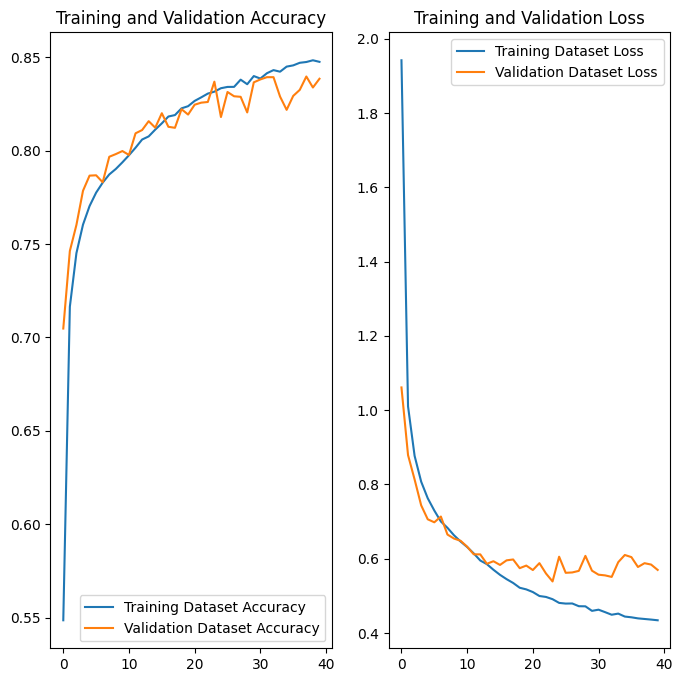

In [53]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label = 'Training Dataset Accuracy')
plt.plot(range(epochs),val_acc,label = 'Validation Dataset Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label = 'Training Dataset Loss')
plt.plot(range(epochs),val_loss,label = 'Validation Dataset Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

First image to predict:- 
Actual label:-  ell
1/1 [==============================] - 0s 41ms/step
Predicted label:-  &


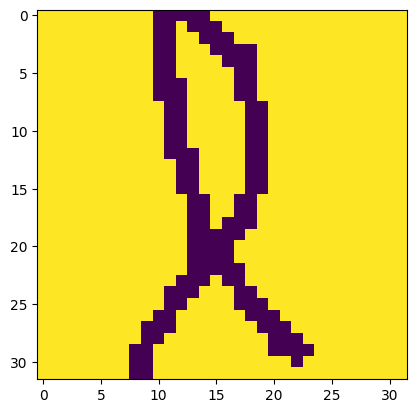

In [33]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict:- ")
    plt.imshow(first_image)
    print("Actual label:- ",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted label:- ",class_names[np.argmax(batch_prediction[0])])

In [54]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 36ms/step


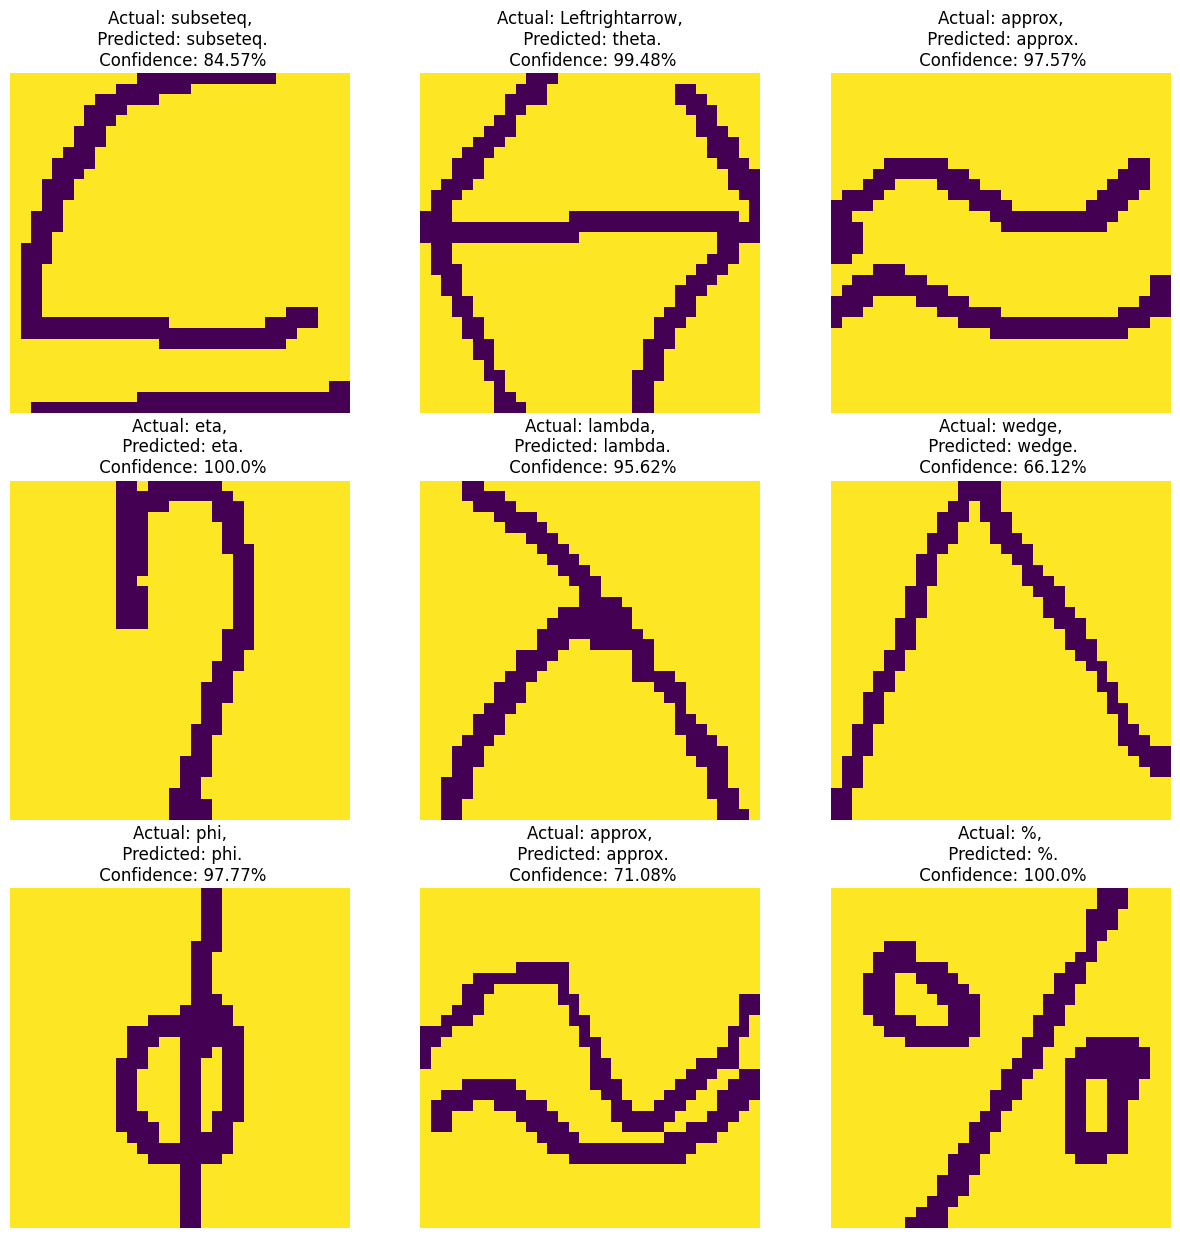

In [55]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [38]:
import os

# Get the maximum version number from filenames that can be converted to integers
model_version = max(
    [int(i) for i in os.listdir("NewModel") if i.isdigit()] + [0]
) + 1

model.save(f"NewModel/{model_version}")


INFO:tensorflow:Assets written to: NewModel/1\assets


INFO:tensorflow:Assets written to: NewModel/1\assets
